In [1]:
import csv
from itertools import count
import operator
import math

EPSILON = 0.000001


def calc_term_doc_given_author(prob_map, counts):
    """
    How likely is the document, given the counts of words in the doc
    and the authors prob_map
    """
    prob = 1
    return prob


# If a word is in a probability dictionary, return its probability
# otherwise, return epsilon
def get_word_prob(word_prob_map, word):
    """
    Gets probability of a word:
    Returns probability if word exists, EPSILON if not
    """
    if word in word_prob_map:
        return word_prob_map[word]
    return EPSILON

# From a file name, approximate the probability of a word
# being generated from the same distribution as the file.
# Assume that each word is produced independently, regardless
# of order.
def make_word_prob_map(fileName):
    """
    Calculates word probabilities:
    1. Counts word frequencies
    2. Converts counts to probabilities
    Returns: word probability dictionary
    """
    wordMap, nWords = make_word_count_map(fileName)
    # print(fileName)
    # print("----------------------------")
    # print(wordMap)
    # print("----------------------------")
    # print(nWords)
    # print("----------------------------")
    probabilityMap = {}
    for word in wordMap:
        count = wordMap[word]
        p = float(count) / nWords
        probabilityMap[word] = p
    return probabilityMap

# From a file name, count the number of times each word exists
# in that file. Return the result as a map (aka a dictionary)
def make_word_count_map(fileName):
    """
    Reads a file and counts word frequencies:
    1. Opens file
    2. Splits into words
    3. Standardizes each word
    4. Counts occurrences
    Returns: (wordMap, total word count)
    """
    wordMap = {}
    nWords = 0
    with open(fileName ,encoding="utf-8") as f:
        for line in f:
            words = line.split(' ')
            for word in words:
                word = standardize(word)
                add_word_to_count_map(wordMap, word)
                nWords+= 1
    return wordMap, nWords

# Add a word to a count map. Makes sure not to crash if the
# word has not been seen before.
def add_word_to_count_map(wordMap, word):
    """
    Updates word count in dictionary:
    1. Skips stop words
    2. Initializes count if new word
    3. Increments count if existing word
    """
    if is_stop(word):
        return
    if not word in wordMap:
        wordMap[word] = 0
    wordMap[word] += 1


def standardize(word):
    """
    Standardizes words by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Keeping only alphabetic characters
    """
    standard = word.lower().strip()
    # remove punctuation
    standard = ''.join([i for i in standard if i.isalpha()])
    return standard

def is_stop(word):
    """
    Removes common words that don't help in analysis
    """
    stop_words = ['to', 'i', 'the', 'and', 'of']
    return word in stop_words


def main():
    # Calculate all the ps and qs
    # Eg hamiltonWordProb['congress'] = 0.005
    # hamilton_word_prob['piech'] = 0.0
    # hamilton_word_prob['the'] = 0.001

    hamilton_word_prob = make_word_prob_map('hamilton.txt')
    madison_word_prob = make_word_prob_map('madison.txt')

    # print("********************************************")
    # print("hamilton_word_prob", hamilton_word_prob)
    # print("----------------------------------------------")
    # print("madison_word_prob", madison_word_prob)
    # print("--------------------------------------")
    # print("********************************************")

    # print(hamilton_word_prob["independent"])
    # print(madison_word_prob["independent"])

    unknown_doc_count, n_words = make_word_count_map('unknown.txt')

    print("*" * 50)
    print(unknown_doc_count)
    print("*" * 50)
    print(n_words)


if __name__ == '__main__':
    main()

**************************************************
{'people': 7, 'state': 8, 'new': 3, 'york': 1, 'shall': 1, 'here': 2, 'perhaps': 3, 'be': 51, 'reminded': 1, 'a': 48, 'current': 1, 'observation': 2, 'that': 24, 'where': 6, 'annual': 6, 'elections': 14, 'end': 1, 'tyranny': 2, 'begins': 1, '': 2, 'if': 7, 'it': 18, 'true': 4, 'as': 22, 'has': 8, 'often': 2, 'been': 7, 'remarked': 1, 'sayings': 1, 'which': 23, 'become': 5, 'proverbial': 2, 'are': 19, 'generally': 1, 'founded': 2, 'in': 45, 'reason': 3, 'is': 28, 'not': 19, 'less': 6, 'when': 1, 'once': 1, 'established': 6, 'they': 12, 'applied': 1, 'cases': 3, 'them': 7, 'does': 4, 'extend': 1, 'need': 1, 'look': 1, 'for': 21, 'proof': 1, 'beyond': 2, 'case': 4, 'before': 2, 'us': 2, 'what': 4, 'on': 8, 'this': 15, 'no': 10, 'man': 2, 'will': 25, 'subject': 5, 'himself': 1, 'ridicule': 1, 'pretending': 1, 'any': 6, 'natural': 2, 'connection': 2, 'subsists': 1, 'between': 7, 'sun': 1, 'or': 12, 'seasons': 1, 'period': 7, 'within': 4, 'h

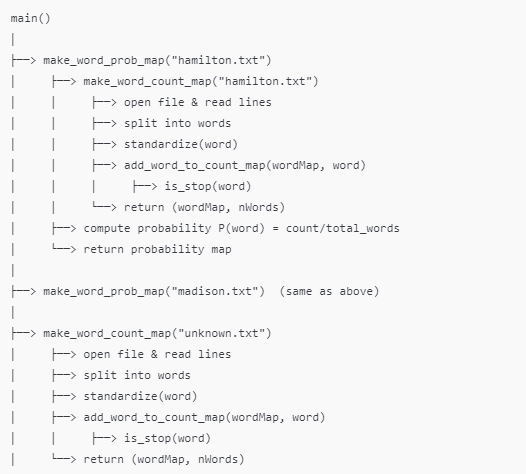

In [2]:
import csv
from itertools import count
import operator
import math

EPSILON = 0.000001


def calc_term_doc_given_author(prob_map, counts):
    """
    How likely is the document, given the counts of words in the doc
    and the authors prob_map
    """
    # prob = 1
    # for word, c_i in counts.items():
    #     p_word = get_word_prob(prob_map, word)
    #     prob *= p_word ** c_i
    #     print(word, c_i, prob)
    # return prob
    prob = 0
    for word, c_i in counts.items():
        p_word = get_word_prob(prob_map, word)
        prob += math.log(p_word) * c_i
    return prob


# If a word is in a probability dictionary, return its probability
# otherwise, return epsilon
def get_word_prob(word_prob_map, word):
    """
    Gets probability of a word:
    Returns probability if word exists, EPSILON if not
    """
    if word in word_prob_map:
        return word_prob_map[word]
    return EPSILON

# From a file name, approximate the probability of a word
# being generated from the same distribution as the file.
# Assume that each word is produced independently, regardless
# of order.
def make_word_prob_map(fileName):
    """
    Calculates word probabilities:
    1. Counts word frequencies
    2. Converts counts to probabilities
    Returns: word probability dictionary
    """
    wordMap, nWords = make_word_count_map(fileName)
    # print(fileName)
    # print("----------------------------")
    # print(wordMap)
    # print("----------------------------")
    # print(nWords)
    # print("----------------------------")
    probabilityMap = {}
    for word in wordMap:
        count = wordMap[word]
        p = float(count) / nWords
        probabilityMap[word] = p
    return probabilityMap

# From a file name, count the number of times each word exists
# in that file. Return the result as a map (aka a dictionary)
def make_word_count_map(fileName):
    """
    Reads a file and counts word frequencies:
    1. Opens file
    2. Splits into words
    3. Standardizes each word
    4. Counts occurrences
    Returns: (wordMap, total word count)
    """
    wordMap = {}
    nWords = 0
    with open(fileName ,encoding="utf-8") as f:
        for line in f:
            words = line.split(' ')
            for word in words:
                word = standardize(word)
                add_word_to_count_map(wordMap, word)
                nWords+= 1
    return wordMap, nWords

# Add a word to a count map. Makes sure not to crash if the
# word has not been seen before.
def add_word_to_count_map(wordMap, word):
    """
    Updates word count in dictionary:
    1. Skips stop words
    2. Initializes count if new word
    3. Increments count if existing word
    """
    if is_stop(word):
        return
    if not word in wordMap:
        wordMap[word] = 0
    wordMap[word] += 1


def standardize(word):
    """
    Standardizes words by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Keeping only alphabetic characters
    """
    standard = word.lower().strip()
    # remove punctuation
    standard = ''.join([i for i in standard if i.isalpha()])
    return standard

def is_stop(word):
    """
    Removes common words that don't help in analysis
    """
    stop_words = ['to', 'i', 'the', 'and', 'of']
    return word in stop_words


def main():
    # Calculate all the ps and qs
    # Eg hamiltonWordProb['congress'] = 0.005
    # hamilton_word_prob['piech'] = 0.0
    # hamilton_word_prob['the'] = 0.001

    hamilton_word_prob = make_word_prob_map('hamilton.txt')
    madison_word_prob = make_word_prob_map('madison.txt')

    

    # Get the word count of the unknown document
    # Eg unknown_doc_count['congress'] = 5
    unknown_doc_count, n_words = make_word_count_map('unknown2.txt')

    # print("hamilton['congress']\t", hamilton_word_prob['congress'])
    # print("madison['congress']\t",  madison_word_prob['congress'])
    # print("doc_count['congress']\t", unknown_doc_count['congress'])
    # print("n_words", n_words)

    hamilton_term = calc_term_doc_given_author(hamilton_word_prob, unknown_doc_count)
    print('---'*10)
    madison_term = calc_term_doc_given_author(madison_word_prob, unknown_doc_count)
    print("Hamilton Term\t", hamilton_term)
    print("Madison Term\t",madison_term)

if __name__ == '__main__':
    main()

------------------------------
Hamilton Term	 -139253.8767281324
Madison Term	 -159546.7985182855
